# "COVID-19 Infection Detection Using Deep Learning"
> "To Build Medical Support Systems for Early Detection  that can detect Covid-19 infections for high risk patients without conventional testing techniques"

- toc: false
- branch: master
- badges: true
- comments: true
- author: Priyank Negi
- categories: [fastpages, jupyter, Deep Learning] 

# "Covid-19 Classification" 
>Using The SARS-CoV-2 CT-scan dataset for Image Processing and Image Classification

#"Disclaimer"

>This project is for research purposes only and the  purpose of the project is to show the potential of Artificial Intelligence for medical support systems such as diagnosis systems this program is fairly accurate and shows good results both on paper and in real world testing, it is not meant to be an alternative to professional medical diagnosis. 

#"Dataset"

>SARS-CoV-2 CT scan dataset is a public dataset, containing 1252 CT scans (computed tomography scan) that are from positive patients for SARS-CoV-2 infection (COVID-19) and 1230 CT scans for SARS-CoV-2 non-infected patients. This dataset was created by our partners at Lancaster University, PlamenLancaster: Professor Angelov Plamen, and Eduardo Soares.
The dataset has been collected from real patients in Sao Paulo, Brazil. The dataset is available in [Kaggle](www.kaggle.com/plameneduardo/sarscov2-ctscan-dataset). 


In [ ]:
#hide
!nvidia-smi

Tue Jan 19 10:29:07 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 450.36.06    CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Quadro P6000        On   | 00000000:00:05.0 Off |                  Off |
| 26%   21C    P8     8W / 250W |      4MiB / 24449MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#collapse-hide
import sys
if 'google.colab' in sys.modules:
  !pip install -Uqq fastai fastbook  wandb gradio fastai2_extensions

In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
#hide_output
from fastai.vision.all import *
from fastbook import *
import sys
import six

In [ ]:
#collapse-output
import opendatasets as od

dataset_url = 'https://www.kaggle.com/plameneduardo/sarscov2-ctscan-dataset'
od.download(dataset_url)


  2%|▏         | 5.00M/230M [00:00<00:06, 34.4MB/s]

100%|██████████| 230M/230M [00:04<00:00, 52.3MB/s] 


In [ ]:
#hide
# import os
# CT = './sarscov2-ctscan-dataset'
# print(os.listdir(DATA_DIR))

In [ ]:
#hide
!nvidia-smi

Tue Jan 19 09:12:16 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 450.36.06    CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Quadro P6000        On   | 00000000:00:05.0 Off |                  Off |
| 26%   20C    P8     8W / 250W |      4MiB / 24449MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
path=Path('sarscov2-ctscan-dataset')

In [ ]:
path.ls()

(#2) [Path('sarscov2-ctscan-dataset/COVID'),Path('sarscov2-ctscan-dataset/non-COVID')]

In [ ]:
path.ls()[0]

Path('sarscov2-ctscan-dataset/COVID')

In [ ]:
#hide
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
# jovian.utils.colab.set_colab_file_id('1y5klx-9XIy0gBaFwav135CmqAjwYCu7_')

<IPython.core.display.Javascript object>

In [ ]:
#hide
from google.colab import drive
drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
#hide
%cd /content/gdrive/MyDrive/My_Covid_Project/

In [ ]:
# !mkdir  sars_covid
# !mv sarscov2-ctscan-dataset.zip sarscov2-ctscan-dataset

In [ ]:
#collapse-show
from fastai.vision.all import *
from fastbook import *
import sys
import six

In [ ]:
# hide
# !wget -P data/ https://data.mendeley.com/datasets/b6s3963rfx/draft?a=f2372a01-385c-46ec-a650-257e880b16c4

In [ ]:
#hide
# !wget -P data/ https://github.com/tanjiro17/cd19/raw/main/covid.zip
# !unzip data/covid.zip -d data/
# !ls data

# **SNEEK PEAK INTO DATASET**

# Import required libraries and the dataset

>We used FastAI libraries, running the first code block with do this and get the paths to the dataset files.
Import datset

In [ ]:
path.ls()

(#2) [Path('sarscov2-ctscan-dataset/COVID'),Path('sarscov2-ctscan-dataset/non-COVID')]

In [ ]:
(path/'COVID').ls()
#[0]

(#1252) [Path('sarscov2-ctscan-dataset/COVID/Covid (1).png'),Path('sarscov2-ctscan-dataset/COVID/Covid (10).png'),Path('sarscov2-ctscan-dataset/COVID/Covid (100).png'),Path('sarscov2-ctscan-dataset/COVID/Covid (1000).png'),Path('sarscov2-ctscan-dataset/COVID/Covid (1001).png'),Path('sarscov2-ctscan-dataset/COVID/Covid (1002).png'),Path('sarscov2-ctscan-dataset/COVID/Covid (1003).png'),Path('sarscov2-ctscan-dataset/COVID/Covid (1004).png'),Path('sarscov2-ctscan-dataset/COVID/Covid (1005).png'),Path('sarscov2-ctscan-dataset/COVID/Covid (1006).png')...]

In [ ]:
(path/'non-COVID').ls()

(#1229) [Path('sarscov2-ctscan-dataset/non-COVID/Non-Covid (1).png'),Path('sarscov2-ctscan-dataset/non-COVID/Non-Covid (10).png'),Path('sarscov2-ctscan-dataset/non-COVID/Non-Covid (100).png'),Path('sarscov2-ctscan-dataset/non-COVID/Non-Covid (1000).png'),Path('sarscov2-ctscan-dataset/non-COVID/Non-Covid (1001).png'),Path('sarscov2-ctscan-dataset/non-COVID/Non-Covid (1002).png'),Path('sarscov2-ctscan-dataset/non-COVID/Non-Covid (1003).png'),Path('sarscov2-ctscan-dataset/non-COVID/Non-Covid (1004).png'),Path('sarscov2-ctscan-dataset/non-COVID/Non-Covid (1005).png'),Path('sarscov2-ctscan-dataset/non-COVID/Non-Covid (1006).png')...]

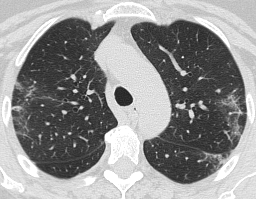

In [ ]:
#looking into the  images downloaded 
import PIL

img1 = PIL.Image.open((path/'COVID').ls()[0])
img2 = PIL.Image.open((path/'non-COVID').ls()[0])

img1

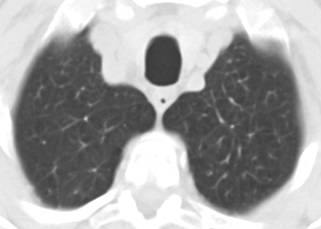

In [ ]:
#collapse-hide 
img2

In [ ]:
#hide
#fns = get_image_files(path)
#fns

In [ ]:
#hide
#failed = verify_images(fns)
#failed

In [ ]:
#hide
# root_dir=Path('/')
# data_dir=root_dir / 'data' / 'ctscan-dataset'
# model_dir= Path('.').absolute() / 'models'

In [ ]:
#hide
# def valid_func(o:Path):
#     return 'test' in str(o)

# def label_func(o:Path):
#     if 'COVID' in o.name:
#         return 'COVID'
    
#     return 'non-COVID'

# Creating a datablock to load data into the  Model 

> We are then dividing the dataset in the train and valid set and  We are using the random_state argument in order to replicate the result. The valid_pct argument represents the proportion of the dataset to include in the valid (in our case the 20%). Since we set the shufflue argument to True, the data will be shufflued before the split.

>Now we need to import the dataset into this notebook. run the following code blocks to import the COVID dataset as a FastAI DataBlock

>In the ImageDataBunch.from_name_list function we can see that we pass the dataset_dir we created earlier in the tutorial, fileNames that we created earlier, pattern for the files, some augmentation, the size of the images we need to replicate original model input sizes.
data.show_batch()

>This function to show a batch of our data. Run the code block to do this and view the results.

In [ ]:
path.ls()

(#2) [Path('sarscov2-ctscan-dataset/COVID'),Path('sarscov2-ctscan-dataset/non-COVID')]

In [ ]:
def get_dls(bs,size):
    dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                       get_items=get_image_files,
                       get_y=parent_label,
                       splitter=RandomSplitter(valid_pct=0.2, seed=42),
                       item_tfms=Resize(460),
                       #presizing is done 
                       #earlier size was 224 without progressive resizing but now including progressive resizing 
                       batch_tfms=[*aug_transforms(size=size,min_scale=0.75),
                       Normalize.from_stats(*imagenet_stats)])
    return dblock.dataloaders(path,bs=bs)


In [ ]:
dls=get_dls(224,224)  #training data loader 

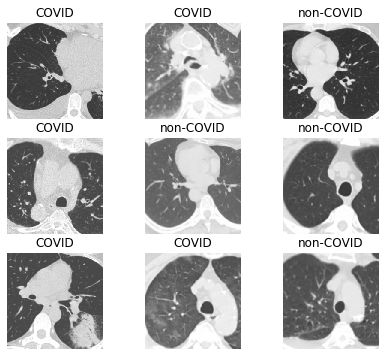

In [ ]:
dls.show_batch(nrows=3, figsize=(7,6))

In [ ]:
#hide
torch.cuda.set_device(0)
torch.cuda.get_device_name()

'Quadro P6000'

In [ ]:
pip install  fastai2_extensions import fastai_amalgam

  Created wheel for import: filename=import-0.0.1-py3-none-any.whl size=1530 sha256=9bd3840c4e7e667f70c94196e9d176f55cc0ee59d0d4ee929a53a85b11e7363d
  Stored in directory: /root/.cache/pip/wheels/0f/41/57/d1c235156724243fd0c36c0e237a1775eabd8d442ff9d039e8
Successfully built import
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from fastai.metrics import *
from fastai_amalgam.utils import *

In [ ]:
#collapse-show
@delegates(to=PILImage.draw_labels)
def draw_label(x, **kwargs):
    return PILImage.create(x[0]).draw_labels(x[1], **kwargs)

In [ ]:
#collapse-show
@patch
@delegates(to=draw_label, but=["font_color", "location", "draw_rect", "fsize_div_factor", "font_path", "font_size"])
def show_batch_grid(self:TfmdDL, b=None, n=20, ncol=4, show=True, unique=False,
                    unique_each=True, font_path=None, font_size=20, **kwargs):
    """Show a batch of images
    Key Params:
      * n:      No. of images to display
      * n_col:  No. of columns in the grid
      * unique: Display the same image with different augmentations
      * unique_each: If True, displays a different img on each call
      * font_path:   Path to the `.ttf` font file. Required to display labels
      * font_size:   Size of the font
    """
    if font_path is not None: self.set_font_path(font_path)
    if not hasattr(self, 'font_path'):
        self.font_path = font_path
    if unique:
        old_get_idxs = self.get_idxs
        if unique_each:
            i = np.random.choice(self.n)
            self.get_idxs = partial(itertools.repeat, i)
        else:
            self.get_idxs = lambda: Inf.zeros
    if b is None: b = self.one_batch()
    if not show: return self._pre_show_batch(b, max_n=n)
    _,__, b = self._pre_show_batch(b, max_n=n)
    if unique: self.get_idxs = old_get_idxs
    return make_img_grid([draw_label(i, font_path=self.font_path, font_size=font_size) for i in b],
                         ncol=ncol, img_size=None)

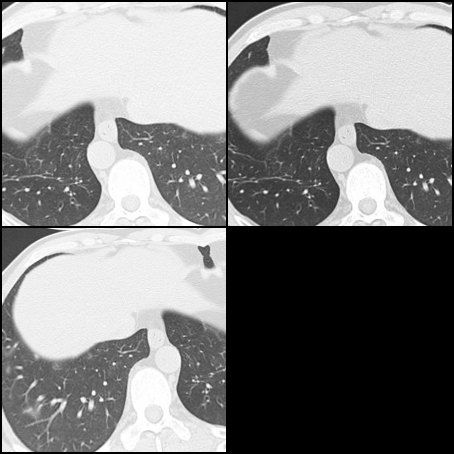

In [ ]:
dls.show_batch_grid(n=3, ncol=2, unique=True)

# Transfer Learning

# The Resnet50 model

# What and why did we  use transfer learning?

>Transfer learning is meaning use a pre-trained model to build our classifier. A pre-trained model is a model that has been previously trained on a dataset. The model comprehends the updated weights and bias.  Using a pre-trained model you are saving time and computational resources. Another avantage is that pre-trained models often perform better that architecture designed from scratch. To better understand this point, suppose we  want to build a classifier able to sort different sailboat types. A model pre-trained on ships would have already capture in its first layers some boat features, learning faster and with better accuracy among the different sailboat types.

# The Resnet50 architecture

>Resnet50 generally is considered a good choice as first architecture to test, it shows good performance without an excessive size allowing to use a higher batch size and thus less computation time. For this reason, before to test more complex architectures Resnet50 is a good compromise.

>Residual net have been ideated to solve the problem of the **vanishing gradient**. Highly intricate networks with a large number of hidden layer are working effectively in solving complicated tasks. Their structures allow them to catch pattern in complicated data. When we train the network the early layer tend to be trained slower (the gradient are smaller during backpropagation). The initial layers are important because they learn the basic feature of an object (edge, corner and so on). Failing to proper train these layers lead to a decrease in the overall accuracy of the model.

>**Residual neural network** have been ideated to solve this issue. The Resnet model presents the possibility to skip the training of some layer during the initial training. The skipped layer is reusing the learned weights from the previous layer. [Original research article](https://arxiv.org/pdf/1512.03385.pdf)

#Test the Resnet34 architecture with our dataset
>Now we are going to test how the FastaAI implementation of this architechture works with the COVID dataset.

>Create the convolutional neural network
First we will create the convolutional neural network based on this architechture, to do this we can use the following code block which uses FastAI ( cnn_learner previously create_cnn) function. We pass the loaded data, specify the model, pass error_rate & accuracy as a list for the metrics parameter specifying we want to see both error_rate and accuracy, and finally specify a weight decay of 1e-1 (1.0).

# learn.lr_find() & learn.recorder.plot()
>Now we will use the [learn.lr_find()](https://docs.fast.ai/basic_train.html#lr_find) function to run LR Finder. LR Finder help to find the best learning rate to use with our network. For more information the [original paper](https://arxiv.org/pdf/1506.01186.pdf). 
As shown from the output of above,  [learn.recorder.plot()](https://docs.fast.ai/basic_train.html#Recorder.plot) function plot the loss over learning rate. Run the following code block to view the graph. The best learning rate should be chosen as the learning rate value where the curve is the steepest. You may try different learning rate values in order to pick up the best.

# learn.fit_one_cycle() & learn.recorder.plot_losses()
>The [learn.fit_one_cycle()](https://docs.fast.ai/basic_train.html#fit_one_cycle) function can be used to fit the model. Fit one cycle reach a comparable accuracy faster than th *fit* function in training of complex models. Fit one cycle instead of maintain fix the learning rate during all the iterations is linearly increasing the learning rate and then it is decreasing again (this process is what is called one cycle). Moreover, this learning rate variation is helping in preventing overfitting. We use 5 for the parameter *cyc_len* to specify the number of cycles to run (on cycle can be considered equivalent to an epoch), and *max_lr* to specify the maximum learning rate to use which we set as *0.001*. Fit one cycle varies the learning rate from 10 fold less the maximum learning rate selected. For more information about fit one cycle: [article](https://arxiv.org/pdf/1803.09820.pdf). We then use [learn.recorder.plot_losses()](https://docs.fast.ai/basic_train.html#Recorder.plot_losses) to plot the losses from *fit_one_cycle* as a graph.

In [ ]:
#hide
#mixup = MixUp(0.5)
#learn = cnn_learner(dls, resnet18, metrics=accuracy, pretrained=True, cbs=mixup)

#with learn.removed_cbs(mixup):
  #  learn.export("export_noMixUp")

In [ ]:
from fastai.vision.all import *

In [ ]:
#hide
!nvidia-smi

Tue Jan 19 09:24:46 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 450.36.06    CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Quadro P6000        On   | 00000000:00:05.0 Off |                  Off |
| 26%   22C    P8     8W / 250W |   2853MiB / 24449MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#hide
#BottleNeck Layer Test

In [ ]:
#hide
def get_learner(m):
    return Learner(dls, m, loss_func=nn.CrossEntropyLoss(), metrics=[accuracy, error_rate], wd=1e-1, cbs=MixUp(0.5)).to_fp16()

#learn = get_learner(get_model())

In [ ]:
#hide
def _conv_block(ni,nf,stride):
    return nn.Sequential(
        ConvLayer(ni, nf, stride=stride),
        ConvLayer(nf, nf, act_cls=None, norm_type=NormType.BatchZero))

In [ ]:
#hide
class ResBlock(Module):#ResBlock to account for changing sizes 
    def __init__(self, ni, nf, stride=1):
        self.convs = _conv_block(ni,nf,stride)
        self.idconv = noop if ni==nf else ConvLayer(ni, nf, 1, act_cls=None)
        self.pool = noop if stride==1 else nn.AvgPool2d(2, ceil_mode=True)

    def forward(self, x):
        return F.relu(self.convs(x) + self.idconv(self.pool(x)))

In [ ]:
#hide
def block(ni, nf):
    return nn.Sequential(ResBlock(ni, nf, stride=2), ResBlock(nf, nf))

In [ ]:
#hide
def _resnet_stem(*sizes):# first layers that is stem of N/W
    return [
        ConvLayer(sizes[i], sizes[i+1], 3, stride = 2 if i==0 else 1)
            for i in range(len(sizes)-1)
    ] + [nn.MaxPool2d(kernel_size=3, stride=2, padding=1)]

In [ ]:
#hide
_resnet_stem(3,32,32,64)

In [ ]:
#hide
class ResNet(nn.Sequential):
    def __init__(self, n_out, layers, expansion=1):
        stem = _resnet_stem(3,32,32,64)
        self.block_szs = [64, 64, 128, 256, 512]
        for i in range(1,5): self.block_szs[i] *= expansion
        blocks = [self._make_layer(*o) for o in enumerate(layers)]
        super().__init__(*stem, *blocks,
                         nn.AdaptiveAvgPool2d(1), Flatten(),
                         nn.Linear(self.block_szs[-1], n_out))

    def _make_layer(self, idx, n_layers):
        stride = 1 if idx==0 else 2
        ch_in,ch_out = self.block_szs[idx:idx+2]
        return nn.Sequential(*[
            ResBlock(ch_in if i==0 else ch_out, ch_out, stride if i==0 else 1)
            for i in range(n_layers)
        ])

In [ ]:
#hide
rn = ResNet(dls.c, [2,2,2,2])#Resnet 18 groups

In [ ]:
#hide
def _conv_block(ni,nf,stride):# for Bottleneck zWe’ll use this to create a ResNet-50 with group sizes of (3,4,6,3). We now need to pass 4 into the expansion parameter of ResNet, since we need to start with four times fewer channels and we’ll end with four times more channels.
    return nn.Sequential(
        ConvLayer(ni, nf//4, 1),
        ConvLayer(nf//4, nf//4, stride=stride),
        ConvLayer(nf//4, nf, 1, act_cls=None, norm_type=NormType.BatchZero))
 #bottleneck design we’ve shown here is typically used in only ResNet-50, -101,
 # and -152 models

In [ ]:
#hide
rn = ResNet(dls.c, [3,4,6,3], 4)# Resnet 50 groups

In [ ]:
#hide
learn = get_learner(rn)
learn.fit_one_cycle(80, 3e-3)

In [ ]:
#hide
#Test Ending 

In [ ]:
learn = cnn_learner(dls, resnet101, loss_func=CrossEntropyLossFlat(), metrics=[error_rate,accuracy], wd=1e-1).to_fp16()

In [ ]:
#hide
#learn.fit_one_cycle(1, cbs=mixup)

In [ ]:
learn.cbs

(#4) [TrainEvalCallback,Recorder,ProgressCallback,MixedPrecision]

In [ ]:
learn.fit_one_cycle(80, 3e-3, cbs=MixUp(0.5))
 

In [ ]:
preds,targs = learn.tta() # TTA use only for validation dataset
accuracy(preds, targs).item()

0.9959677457809448

# ClassificationInterpretationEx

In [ ]:
#collapse-show
#export
import fastai

def _get_truths(vocab, label_idx, is_multilabel):
    if is_multilabel:
          return ';'.join([vocab[i] for i in torch.where(label_idx==1)][0])
    else: return vocab[label_idx]

class ClassificationInterpretationEx(ClassificationInterpretation):
    """
    Extend fastai2's `ClassificationInterpretation` to analyse model predictions in more depth
    See:
      * self.preds_df
      * self.plot_label_confidence()
      * self.plot_confusion_matrix()
      * self.plot_accuracy()
      * self.get_fnames()
      * self.plot_top_losses_grid()
      * self.print_classification_report()
    """
    def __init__(self, dl, inputs, preds, targs, decoded, losses):
        super().__init__(dl, inputs, preds, targs, decoded, losses)
        self.vocab = self.dl.vocab
        if is_listy(self.vocab): self.vocab = self.vocab[-1]
        if self.targs.__class__ == fastai.torch_core.TensorMultiCategory:
              self.is_multilabel = True
        else: self.is_multilabel = False
        self.compute_label_confidence()
        self.determine_classifier_type()

    def determine_classifier_type(self):
        if self.targs[0].__class__==fastai.torch_core.TensorCategory:
            self.is_multilabel = False
        if self.targs[0].__class__==fastai.torch_core.TensorMultiCategory:
            self.is_multilabel = True
            self.thresh = self.dl.loss_func.thresh

    def compute_label_confidence(self, df_colname:Optional[str]="fnames"):
        """
        Collate prediction confidence, filenames, and ground truth labels
        in DataFrames, and store them as class attributes
        `self.preds_df` and `self.preds_df_each`

        If the `DataLoaders` is constructed from a `pd.DataFrame`, use
        `df_colname` to specify the column name with the filepaths
        """
        if not isinstance(self.dl.items, pd.DataFrame):
            self._preds_collated = [
                #(item, self.dl.vocab[label_idx], *preds.numpy()*100)\
                (item, _get_truths(self.dl.vocab, label_idx, self.is_multilabel), *preds.numpy()*100)\
                for item,label_idx,preds in zip(self.dl.items,
                                                self.targs,
                                                self.preds)
            ]
        ## need to extract fname from DataFrame
        elif isinstance(self.dl.items, pd.DataFrame):
            self._preds_collated = [
                #(item[df_colname], self.dl.vocab[label_idx], *preds.numpy()*100)\
                (item[df_colname], _get_truths(self.dl.vocab, label_idx, self.is_multilabel), *preds.numpy()*100)\
                for (_,item),label_idx,preds in zip(self.dl.items.iterrows(),
                                                self.targs,
                                                self.preds)
            ]

        self.preds_df       = pd.DataFrame(self._preds_collated, columns = ['fname','truth', *self.dl.vocab])
        self.preds_df.insert(2, column='loss', value=self.losses.numpy())

        if self.is_multilabel: return # preds_df_each doesnt make sense for multi-label
        self._preds_df_each = {l:self.preds_df.copy()[self.preds_df.truth == l].reset_index(drop=True) for l in self.dl.vocab}
        self.preds_df_each  = defaultdict(dict)


        sort_desc = lambda x,col: x.sort_values(col, ascending=False).reset_index(drop=True)
        for label,df in self._preds_df_each.items():
            filt = df[label] == df[self.dl.vocab].max(axis=1)
            self.preds_df_each[label]['accurate']   = df.copy()[filt]
            self.preds_df_each[label]['inaccurate'] = df.copy()[~filt]

            self.preds_df_each[label]['accurate']   = sort_desc(self.preds_df_each[label]['accurate'], label)
            self.preds_df_each[label]['inaccurate'] = sort_desc(self.preds_df_each[label]['inaccurate'], label)
            assert len(self.preds_df_each[label]['accurate']) + len(self.preds_df_each[label]['inaccurate']) == len(df)

    def get_fnames(self, label:str,
                   mode:('accurate','inaccurate'),
                   conf_level:Union[int,float,tuple]) -> np.ndarray:
        """
        Utility function to grab filenames of a particular label `label` that were classified
        as per `mode` (accurate|inaccurate).
        These filenames are filtered by `conf_level` which can be above or below a certain
        threshold (above if `mode` == 'accurate' else below), or in confidence ranges
        """
        assert label in self.dl.vocab
        if not hasattr(self, 'preds_df_each'): self.compute_label_confidence()
        df = self.preds_df_each[label][mode].copy()
        if mode == 'accurate':
            if isinstance(conf_level, tuple):       filt = df[label].between(*conf_level)
            if isinstance(conf_level, (int,float)): filt = df[label] > conf_level
        if mode == 'inaccurate':
            if isinstance(conf_level, tuple):       filt = df[label].between(*conf_level)
            if isinstance(conf_level, (int,float)): filt = df[label] < conf_level
        return df[filt].fname.values

In [ ]:
interp       = ClassificationInterpretationEx.from_learner(learn)

In [ ]:
interp.preds_df.head(2)

fname      truth      loss  \
0  sarscov2-ctscan-dataset/non-COVID/Non-Covid (386).png  non-COVID  0.047037   
1          sarscov2-ctscan-dataset/COVID/Covid (581).png      COVID  0.018380   

       COVID  non-COVID  
0   4.594821  95.405182  
1  98.178818   1.821182

In [ ]:
#hide
interp_multi.preds_df.tail(2)

#ClassificationInterpretationEx.get_fnames

In [ ]:
#hide
!ls

2021-01-14-Covid19.ipynb  datasets    kaggle.json	       storage
covify.ipynb		  export.pkl  sarscov2-ctscan-dataset


In [ ]:
#hide
!pip install ipywidgets

In [ ]:
#hide
from ipywidgets import Button, Layout

In [ ]:
#hide
btn_upload = widgets.FileUpload()
btn_upload



FileUpload(value={}, description='Upload')

In [ ]:
#hide
img1 = PILImage.create(btn_upload.data[-1])

IndexError: list index out of range

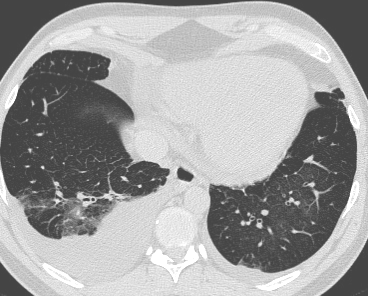

In [ ]:
#hide
img1

In [ ]:
#collapse-hide
# return accuratly classified files with accuracy above 85%
interp.get_fnames('accurate', 99.95)

TypeError: get_fnames() missing 1 required positional argument: 'conf_level'

In [ ]:
#collapse-output
#hide_output
# return inaccurately classified files with accuracy between 84.1 - 85.2%
interp.get_fnames('img1', 'accurate', (84.1, 85.2))

AssertionError: 

In [ ]:
#hide
!pip install fastai2_extensions

In [ ]:
#hide
!pip install palettable

     |████████████████████████████████| 111 kB 16.8 MB/s eta 0:00:01


#Confusion Matrix

In [ ]:
#collapse-show
from palettable.scientific.sequential import Davos_3_r

@patch
def plot_confusion_matrix(self:ClassificationInterpretationEx, normalize=True, title='Confusion matrix', cmap=None, norm_dec=2,
                          plot_txt=True, return_fig=False, dpi=100, figsize=(5,5), **kwargs):
    """
    Plot the confusion matrix

    A near exact replica of fastai's method, with the added option
    of `return_fig`, to be able to save the image to disk and a
    different default colormap
    """
    if self.is_multilabel:
        raise NotImplementedError(f"Confusion matrices for multi-label problems aren't implemented")
    # This function is mainly copied from the sklearn docs
    cm = self.confusion_matrix()
    if normalize: cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fig = plt.figure(dpi=dpi, figsize=figsize, **kwargs)
    if cmap is None: cmap=Davos_3_r.mpl_colormap
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(self.vocab))
    plt.xticks(tick_marks, self.vocab, rotation=90)
    plt.yticks(tick_marks, self.vocab, rotation=0)

    if plot_txt:
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            coeff = f'{cm[i, j]:.{norm_dec}f}' if normalize else f'{cm[i, j]}'
            plt.text(j, i, coeff, horizontalalignment="center", verticalalignment="center", color="white" if cm[i, j] > thresh else "black")

    ax = fig.gca()
    ax.set_ylim(len(self.vocab)-.5,-.5)

    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.grid(False)
    if return_fig: return fig

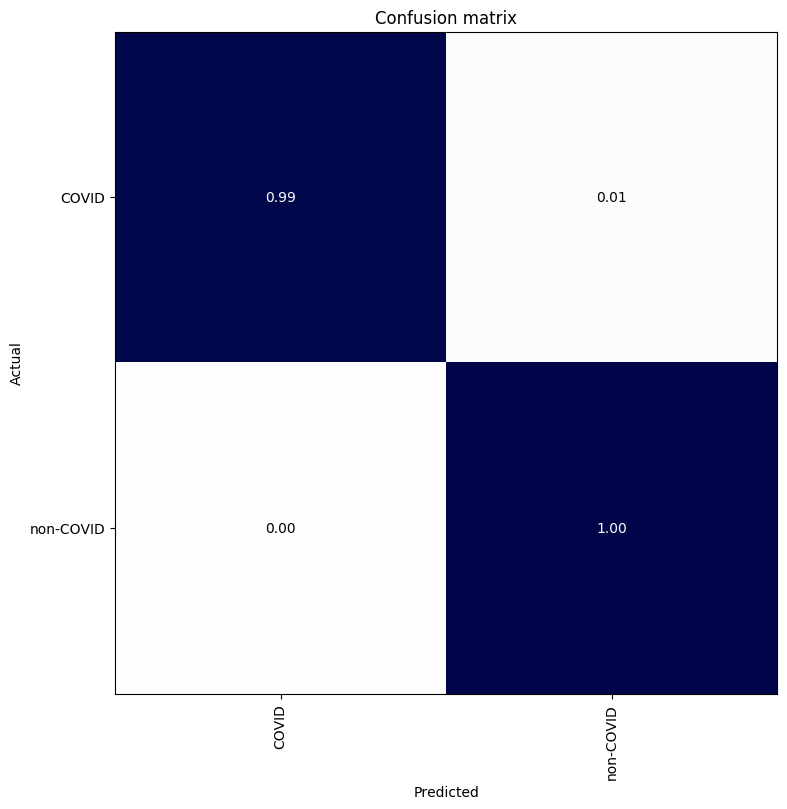

In [ ]:
interp.plot_confusion_matrix(figsize=(8,8))

#Plot Accuracy

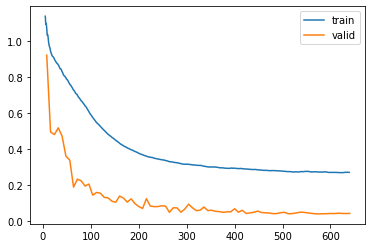

In [ ]:
learn.recorder.plot_loss()# plot curves of training process

In [ ]:
#collapse-show
@patch
def plot_accuracy(self:ClassificationInterpretationEx, width=0.9, figsize=(6,6), return_fig=False,
                  title='Accuracy Per Label', ylabel='Accuracy (%)', style='ggplot',
                  color='#2a467e', vertical_labels=True):
    'Plot a bar plot showing accuracy per label'
    if not hasattr(self, 'preds_df_each'):
        raise NotImplementedError
    plt.style.use(style)
    if not hasattr(self, 'preds_df_each'): self.compute_label_confidence()
    self.accuracy_dict = defaultdict()

    for label,df in self.preds_df_each.items():
        total = len(df['accurate']) + len(df['inaccurate'])
        self.accuracy_dict[label] = 100 * len(df['accurate']) / total

    fig,ax = plt.subplots(figsize=figsize)

    x = self.accuracy_dict.keys()
    y = [v for k,v in self.accuracy_dict.items()]

    rects = ax.bar(x,y,width,color=color)
    for rect in rects:
        ht = rect.get_height()
        ax.annotate(s  = f"{ht:.02f}",
                    xy = (rect.get_x() + rect.get_width()/2, ht),
                    xytext = (0,3), # offset vertically by 3 points
                    textcoords = 'offset points',
                    ha = 'center', va = 'bottom'
                   )
    ax.set_ybound(lower=0, upper=100)
    ax.set_yticks(np.arange(0,110,10))
    ax.set_ylabel(ylabel)
    ax.set_xticklabels(x, rotation='vertical' if vertical_labels else 'horizontal')
    plt.suptitle(title)
    plt.tight_layout()
    if return_fig: return fig

<ipython-input-67-2c6afab5379f>:25: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s  = f"{ht:.02f}",
<ipython-input-67-2c6afab5379f>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation='vertical' if vertical_labels else 'horizontal')


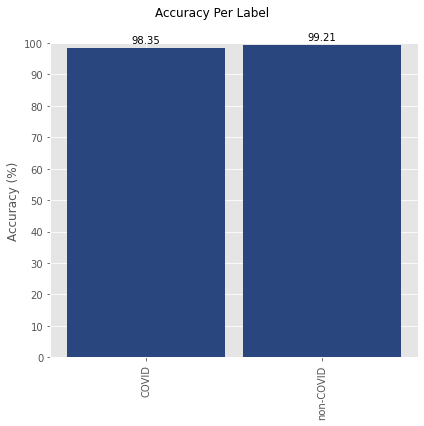

In [ ]:
interp.plot_accuracy()

# Plot Label Confidence

In [ ]:
#collapse-show
@patch
def plot_label_confidence(self:ClassificationInterpretationEx, bins:int=5, fig_width:int=12, fig_height_base:int=4,
                          title:str='Accurate vs. Inaccurate Predictions Confidence (%) Levels Per Label',
                          return_fig:bool=False, label_bars:bool=True, style='ggplot', dpi=150,
                          accurate_color='#2a467e', inaccurate_color='#dc4a46'):
    """Plot label confidence histograms for each label
    Key Args:
      * `bins`:       No. of bins on each side of the plot
      * `return_fig`: If True, returns the figure that can be easily saved to disk
      * `label_bars`: If True, displays the % of samples that fall into each bar
      * `style`:      A matplotlib style. See `plt.style.available` for more
      * `accurate_color`:   Color of the accurate bars
      * `inaccurate_color`: Color of the inaccurate bars
    """
    if not hasattr(self, 'preds_df_each'):
        raise NotImplementedError
    plt.style.use(style)
    fig, axes = plt.subplots(nrows = len(self.preds_df_each.keys()), ncols=2, dpi=dpi,
                             figsize = (fig_width, fig_height_base * len(self.dl.vocab)))
    for i, (label, df) in enumerate(self.preds_df_each.items()):
        height=0
        # find max height
        for mode in ['inaccurate', 'accurate']:
            len_bins,_ = np.histogram(df[mode][label], bins=bins)
            if len_bins.max() > height: height=len_bins.max()

        for mode,ax in zip(['inaccurate', 'accurate'], axes[i]):
            range_ = (50,100) if mode == 'accurate' else (0,50)
            color  = accurate_color if mode == 'accurate' else inaccurate_color
            num,_,patches = ax.hist(df[mode][label], bins=bins, range=range_, rwidth=.95, color=color)
            num_samples = len(df['inaccurate'][label]) + len(df['accurate'][label])
            pct_share   = len(df[mode][label]) / num_samples
            if label_bars:
                for rect in patches:
                    ht = rect.get_height()
                    ax.annotate(s  = f"{round((int(ht) / num_samples) * 100, 1) if ht > 0 else 0}%",
                        xy = (rect.get_x() + rect.get_width()/2, ht),
                        xytext = (0,3), # offset vertically by 3 points
                        textcoords = 'offset points',
                        ha = 'center', va = 'bottom'
                       )
            ax.set_ybound(upper=height + height*0.3)
            ax.set_xlabel(f'{label}: {mode.capitalize()} ({round(pct_share * 100, 2)}%)')
            ax.set_ylabel(f'Num. {mode.capitalize()} ({len(df[mode][label])} of {num_samples})')
    fig.suptitle(title, y=1.0)
    plt.subplots_adjust(top = 0.9, bottom=0.01, hspace=0.25, wspace=0.2)
    plt.tight_layout()
    if return_fig: return fig

<ipython-input-69-1241d4a5b1b6>:37: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s  = f"{round((int(ht) / num_samples) * 100, 1) if ht > 0 else 0}%",


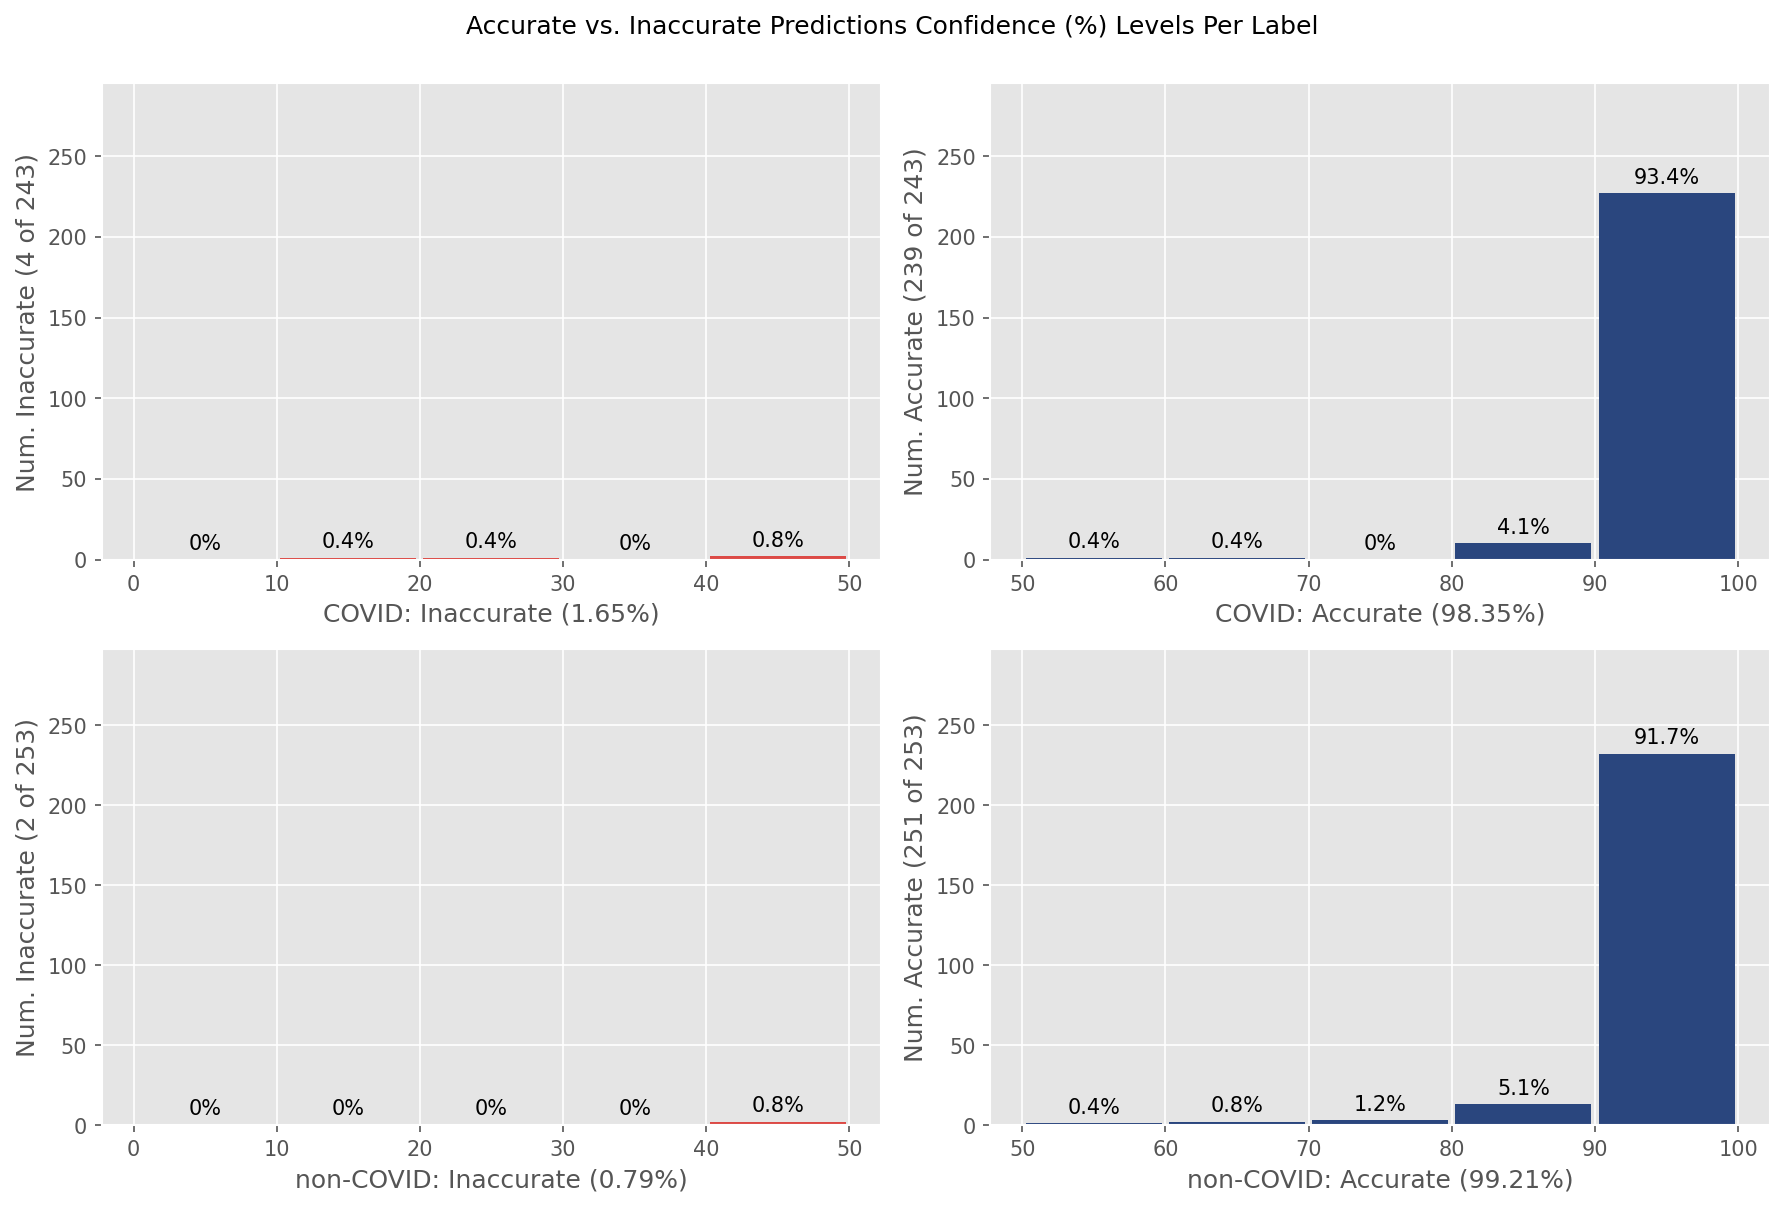

In [ ]:
interp.plot_label_confidence(bins=5)

# Plot Top Losses grid

In [ ]:
#collapse-show
from fastai_amalgam.utils import *
@patch
def plot_top_losses_grid(self:ClassificationInterpretationEx, k=16, ncol=4, __largest=True,
                         font_path=None, font_size=12, use_dedicated_layout=True) -> PIL.Image.Image:
    """Plot top losses in a grid

    Uses fastai'a `ClassificationInterpretation.plot_top_losses` to fetch
    predictions, and makes a grid with the ground truth labels, predictions,
    prediction confidence and loss ingrained into the image

    By default, `use_dedicated_layout` is used to plot the loss (bottom),
    truths (top-left), and predictions (top-right) in dedicated areas of the
    image. If this is set to `False`, everything is printed at the bottom of the
    image
    """
    # all of the pred fetching code is copied over from
    # fastai's `ClassificationInterpretation.plot_top_losses`
    # and only plotting code is added here
    losses,idx = self.top_losses(k, largest=__largest)
    if not isinstance(self.inputs, tuple): self.inputs = (self.inputs,)
    if isinstance(self.inputs[0], Tensor): inps = tuple(o[idx] for o in self.inputs)
    else: inps = self.dl.create_batch(self.dl.before_batch([tuple(o[i] for o in self.inputs) for i in idx]))
    b = inps + tuple(o[idx] for o in (self.targs if is_listy(self.targs) else (self.targs,)))
    x,y,its = self.dl._pre_show_batch(b, max_n=k)
    b_out = inps + tuple(o[idx] for o in (self.decoded if is_listy(self.decoded) else (self.decoded,)))
    x1,y1,outs = self.dl._pre_show_batch(b_out, max_n=k)
    #if its is not None:
    #    _plot_top_losses(x, y, its, outs.itemgot(slice(len(inps), None)), self.preds[idx], losses,  **kwargs)
    plot_items = its.itemgot(0), its.itemgot(1), outs.itemgot(slice(len(inps), None)), self.preds[idx], losses
    def draw_label(x:TensorImage, labels):
        return PILImage.create(x).draw_labels(labels, font_path=font_path, font_size=font_size, location="bottom")
    # return plot_items
    results = []
    for x, truth, preds, preds_raw, loss in zip(*plot_items):
        if self.is_multilabel:
            preds = preds[0]
        probs_i = np.array([self.dl.vocab.o2i[o] for o in preds])
        pred2prob = [f"{pred} ({round(prob.item()*100,2)}%)" for pred,prob in zip(preds,preds_raw[probs_i])]
        if use_dedicated_layout:
            # draw loss at the bottom, preds on top-right
            # and truths on the top
            img = PILImage.create(x)
            if isinstance(truth, Category): truth = [truth]
            truth.insert(0, "TRUTH: ")
            pred2prob.insert(0, 'PREDS: ')
            loss_text = f"{'LOSS: '.rjust(8)} {round(loss.item(), 4)}"
            img.draw_labels(truth,     location="top-left", font_size=font_size, font_path=font_path)
            img.draw_labels(pred2prob, location="top-right", font_size=font_size, font_path=font_path)
            img.draw_labels(loss_text, location="bottom", font_size=font_size, font_path=font_path)
            results.append(img)
        else:
            # draw everything at the bottom
            out = []
            out.append(f"{'TRUTH: '.rjust(8)} {truth}")
            bsl = '\n' # since f-strings can't have backslashes
            out.append(f"{'PRED: '.rjust(8)} {bsl.join(pred2prob)}")
            if self.is_multilabel: out.append('\n')
            out.append(f"{'LOSS: '.rjust(8)} {round(loss.item(), 4)}")
            results.append(draw_label(x, out))
    return make_img_grid(results, img_size=None, ncol=ncol)

In [ ]:
# interp.plot_top_losses_grid(k=4, ncol=4, font_path="../fonts/DIN Alternate Bold.ttf")

/opt/conda/envs/fastai/lib/python3.8/site-packages/fastai_amalgam/utils.py:92: UserWarning: Loaded default PIL ImageFont. It's highly recommended you use a custom font as the default font's size cannot be tweaked
  warnings.warn("Loaded default PIL ImageFont. It's highly recommended you use a custom font as the default font's size cannot be tweaked")
/opt/conda/envs/fastai/lib/python3.8/site-packages/fastai_amalgam/utils.py:94: UserWarning: `font_size` cannot be used when not using a custom font passed via `font_path`
  warnings.warn(f"`font_size` cannot be used when not using a custom font passed via `font_path`")


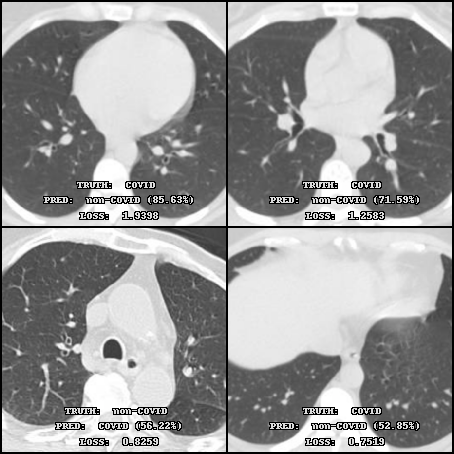

In [ ]:
interp.plot_top_losses_grid(k=4, ncol=2, use_dedicated_layout=False)

In [ ]:
#hide
#interp_multi.plot_top_losses_grid(k=4, ncol=4, font_path="../fonts/DIN Alternate Bold.ttf")

# PlotLowest Losses Grid


In [ ]:
#collapse-show
@patch
@delegates(to=ClassificationInterpretationEx.plot_top_losses_grid, but=['largest'])
def plot_lowest_losses_grid(self:ClassificationInterpretationEx, **kwargs):
    """Plot the lowest losses. Exact opposite of `ClassificationInterpretationEx.plot_top_losses`
    """
    return self.plot_top_losses_grid(__largest=False, **kwargs)

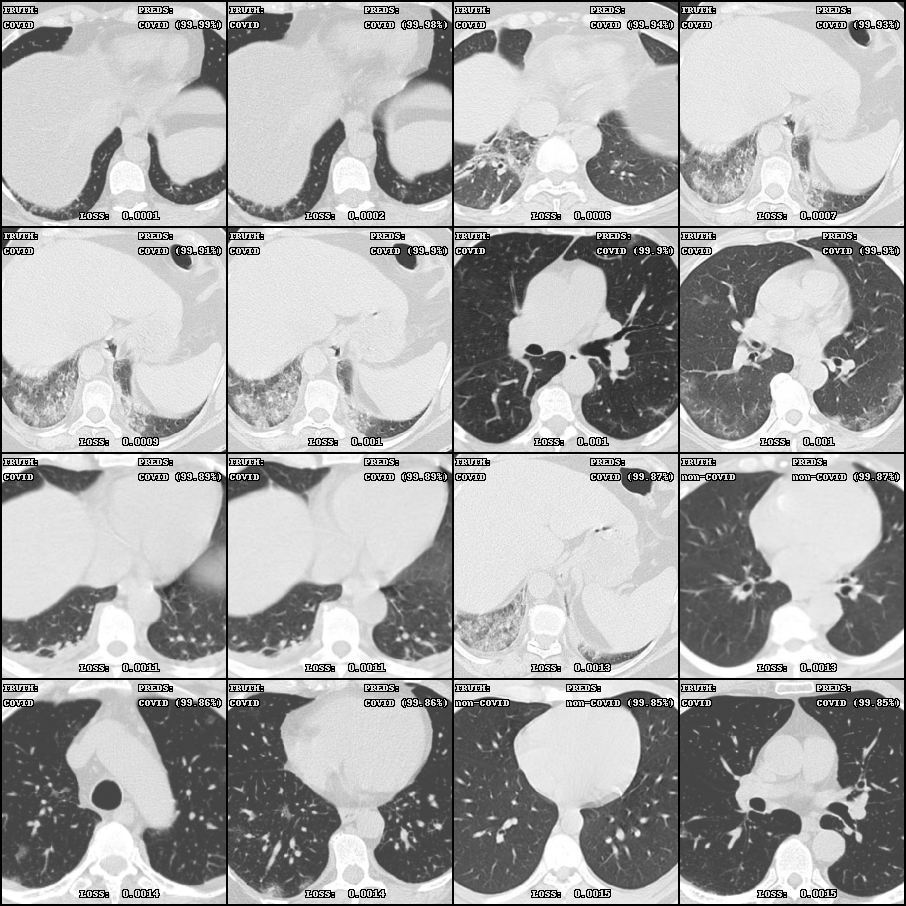

In [ ]:
interp.plot_lowest_losses_grid()

# Classification Report

In [ ]:
#collapse-show
import sklearn.metrics as skm
@patch
def print_classification_report(self:ClassificationInterpretationEx, as_dict=False):
    "Get scikit-learn classification report"
    # `flatten_check` and `skm.classification_report` don't play
    # nice together for multi-label
    # d,t = flatten_check(self.decoded, self.targs)
    d,t = self.decoded, self.targs
    if as_dict:
          return skm.classification_report(t, d, labels=list(self.vocab.o2i.values()), target_names=[str(v) for v in self.vocab], output_dict=True)
    else: return skm.classification_report(t, d, labels=list(self.vocab.o2i.values()), target_names=[str(v) for v in self.vocab], output_dict=False)

In [ ]:
#collapse-hide
print(interp.print_classification_report(as_dict=False))

              precision    recall  f1-score   support

       COVID       0.99      0.98      0.99       243
   non-COVID       0.98      0.99      0.99       253

    accuracy                           0.99       496
   macro avg       0.99      0.99      0.99       496
weighted avg       0.99      0.99      0.99       496



In [ ]:
#hide

In [ ]:
preds,targs = learn.tta() # TTA use only for validation dataset
accuracy(preds, targs).item()

0.9939516186714172

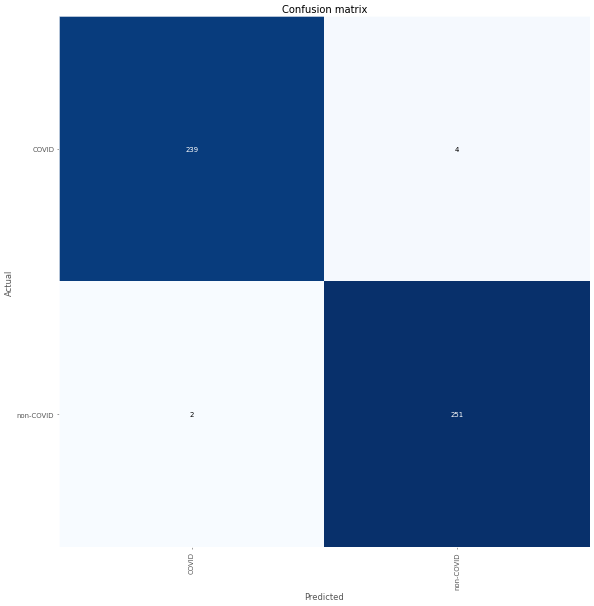

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)# plot confusion matrix
interp.plot_confusion_matrix(figsize=(12,12), dpi=50)

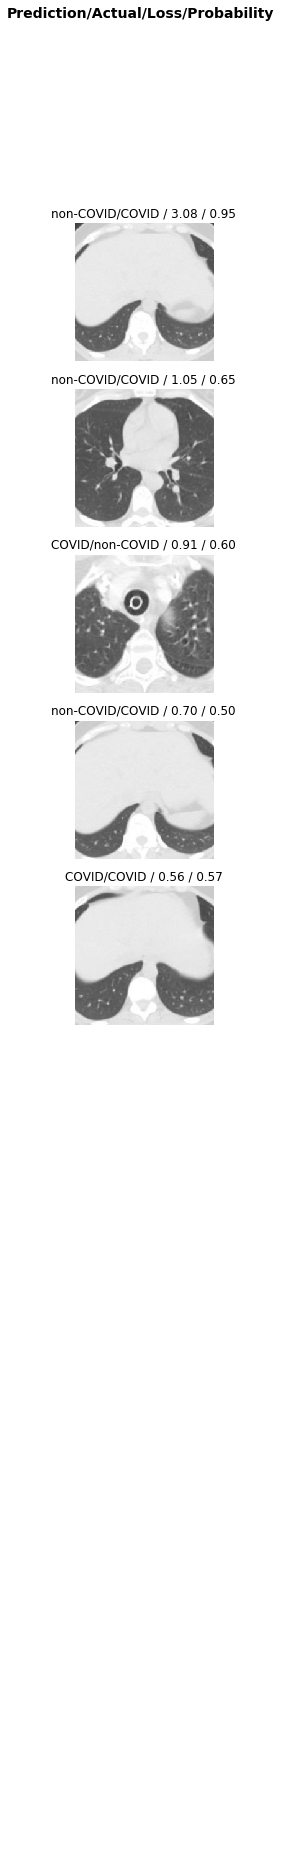

In [ ]:
interp.plot_top_losses(5, nrows=10)# plot top losses 

In [ ]:
learn.export()

In [ ]:
path=Path()
path.ls(file_exts=".pkl")#get export file path

(#1) [Path('export.pkl')]

In [ ]:
#hide_output
del learn
torch.cuda.empty_cache()

In [ ]:
#hide
>Testing Phase

In [ ]:
#hide
learn = cnn_learner(dls, xresnet101, loss_func=CrossEntropyLossFlat(), metrics=[error_rate,accuracy], wd=1e-1).to_fp16()
#learn.fit_one_cycle(1, cbs=mixup)

In [ ]:
#hide
!nvidia-smi

In [ ]:
#hide
# mixup= Mixup(0.5)
learn = cnn_learner(dls,resnet101, pretrained=True, metrics=[error_rate,accuracy],wd=1e-1).to_fp16()

In [ ]:
#hide
del learn
torch.cuda.empty_cache()

In [ ]:
#hide
lr_min,lr_steep = learn.lr_find()# l.r finder

In [ ]:
#hide
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

In [ ]:
#hide
#Experiment Tracking Weights and Biases
# import wandb
# from fastai.callback.wandb import *

# WANDB_NAME = 'enc_dec_axial_test'
# GROUP = 'TEST'
# NOTES = 'run with std attn and axial embs to compare results with positional embs'
# CONFIG = {}
# TAGS =['std_attn','enc_dec','test']

# wandb.init(reinit=True, project="reformer-fastai", entity="fastai_community", 
#            name=WANDB_NAME, group=GROUP, notes=NOTES,  tags=TAGS)

In [ ]:
#hide
# END TESTING

# Resnet-50 Test


In [ ]:
#collapse-show
del learn
torch.cuda.empty_cache()

In [ ]:
#training with smaller image size that is 128*128 rathe than orignal and also smaller  batch sizes for faster training
dls2=get_dls(128,128)

In [ ]:
learn2 = cnn_learner(dls2, xresnet50, metrics=[error_rate,accuracy], wd=1e-1).to_fp16()

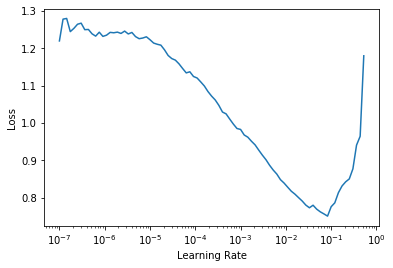

In [ ]:
lr_min,lr_steep = learn2.lr_find()# l.r finder

In [ ]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 8.32e-03, steepest point: 3.31e-04


In [ ]:
learn2.fit_one_cycle(5, 3e-3)

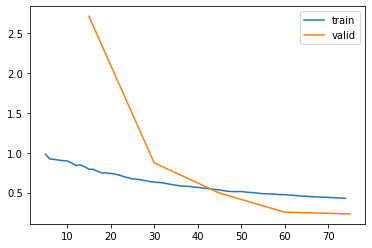

In [ ]:
learn2.recorder.plot_loss()# plot curves of training process

SuggestedLRs(lr_min=6.309573450380412e-08, lr_steep=2.75422871709452e-06)

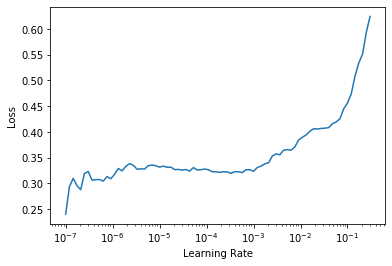

In [ ]:
learn2.unfreeze()
learn2.lr_find()# to finetune my model

In [ ]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 8.32e-03, steepest point: 3.31e-04


In [ ]:
learn2.dls2 = get_dls(12, 224)# training on orignal size 

learn2.fit_one_cycle( 12, slice(1e-5, 1e-4))

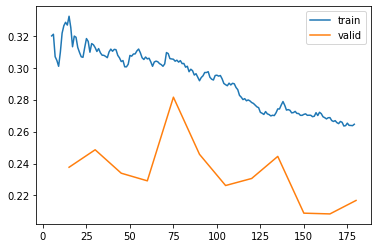

In [ ]:
learn2.recorder.plot_loss()

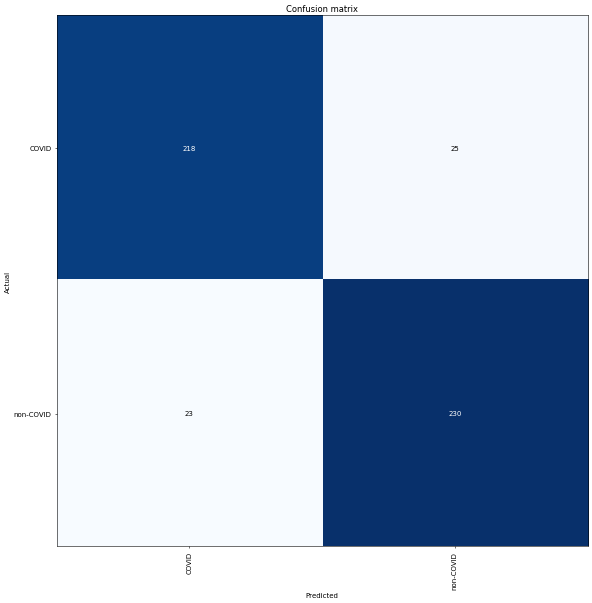

In [ ]:
interp = ClassificationInterpretation.from_learner(learn2)# plot confusion matrix
interp.plot_confusion_matrix(figsize=(12,12), dpi=50)

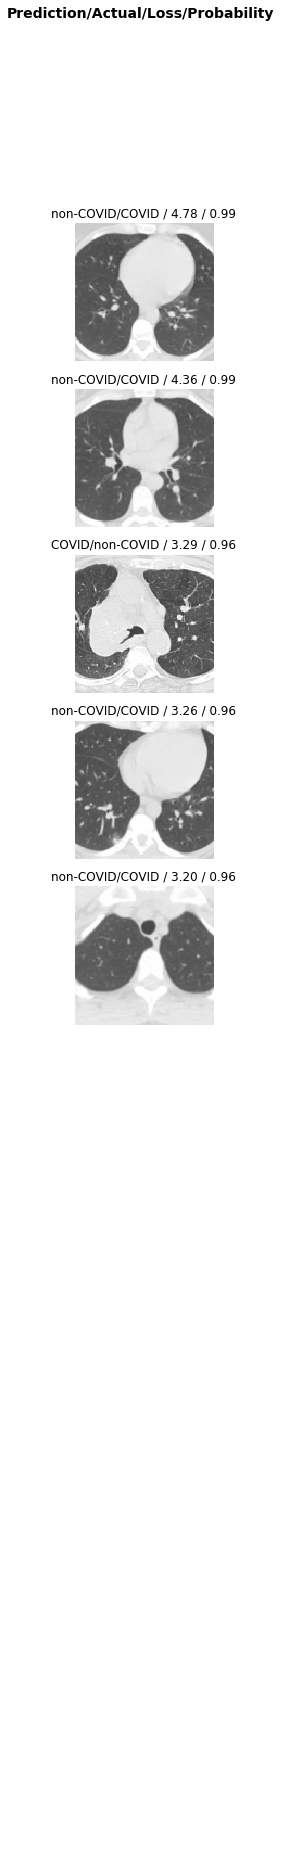

In [ ]:
interp.plot_top_losses(5, nrows=10)# plot top losses 

In [ ]:
learn2.save('resnet50run')

Path('models/resnet50run.pth')

In [ ]:
learn2=learn2.load('resnet50run')

In [ ]:
#collapse-hide
del learn
torch.cuda.empty_cache()

In [ ]:
#collapse-hide
!nvidia-smi

Tue Jan 19 10:23:38 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 450.36.06    CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Quadro P6000        On   | 00000000:00:05.0 Off |                  Off |
| 26%   21C    P8     8W / 250W |    971MiB / 24449MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Testing End


# Save the model
>We can save the model once it has been trained. 

# ClassificationInterpretation()
>We use  [ClassificationInterpretation()](https://docs.fast.ai/vision.learner.html#ClassificationInterpretation) to visualize interpretations of our model.

# interp.plot_top_losses()
>We can use [interp.plot_top_losses()](https://docs.fast.ai/vision.learner.html#plot_top_losses) to view our top losses and their details.

# interp.plot_confusion_matrix()
>We will use  [interp.plot_confusion_matrix()](https://docs.fast.ai/vision.learner.html#ClassificationInterpretation.plot_confusion_matrix) to display a [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix). Below, 2 in the top left square represents  true negatives, while  in the top right square represent false positives, in the bottom left square represents false negatives, and in the bottom right represents true positives.

In [ ]:
learn.recorder.plot_loss()# plot curves of training process

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)# plot confusion matrix
interp.plot_confusion_matrix(figsize=(12,12), dpi=50)

In [ ]:
interp.plot_top_losses(5, nrows=10)# plot top losses 

In [ ]:
#hide
learn.save("resnet_101_13")

Path('models/resnet_101_13.pth')

In [ ]:
learn.export()

In [ ]:
path=Path()
path.ls(file_exts=".pkl")#get export file path

(#1) [Path('export.pkl')]

In [ ]:
#hide
!ls

01_intro.ipynb		 README_es.md
02_production.ipynb	 README_id.md
03_ethics.ipynb		 README_ko.md
04_mnist_basics.ipynb	 README_zh.md
05_pet_breeds.ipynb	 Test Images 
06_multicat.ipynb	 app_blog.ipynb
07_sizing_and_tta.ipynb  app_jupyter.ipynb
08_collab.ipynb		 clean
09_tabular.ipynb	 datasets
10_nlp.ipynb		 environment.yml
11_midlevel_data.ipynb	 export.pkl
12_nlp_dive.ipynb	 fastai2_extensions
13_convolutions.ipynb	 images
14_resnet.ipynb		 kaggle.json
15_arch_details.ipynb	 minor_mixup_50_bottlenceck (1).ipynb
16_accel_sgd.ipynb	 models
17_foundations.ipynb	 requirements.txt
18_CAM.ipynb		 res101_13
19_learner.ipynb	 resmix
20_conclusion.ipynb	 sarscov2-ctscan-dataset
CODE_OF_CONDUCT.md	 settings.ini
LICENSE			 storage
README.md		 tools
README_bn.md		 utils.py


In [ ]:
#for Resnet 101
learn1=load_learner("export.pkl")


In [ ]:
#hide
#learn1=learn.load('models/resnet_101_13.pth') for pth files

In [ ]:
#hide
# preds, y, losses = learn.get_preds(with_loss=True)
# interp = ClassificationInterpretation(learn, preds, y, losses)
# interp.plot_top_losses(9, figsize=(7,7))

#Unfreeze the model
> learn.unfreeze()
Next we use [learn.unfreeze()](https://docs.fast.ai/basic_train.html#Learner.unfreeze) to unfreeze the model. The original model was trained on ImageNet to classify images among 1000 categories. None of these categories is a leukemia cell, for these reason when fast.ai *cnn_learner* function is behind line substituting the last layer with 2 other layers. The last layer is a matrix that has the same size of our data class (*data.c*). Before, we just trained these two layers while the other model's layers were still keeping the downloaded weight. Unfreezing our model allow us to train also these other layers and updates their weights.

# Train the entire (unfrozen) model
>Now that we have unfrozen our model, we will use the following code blocks to train the whole model.

#Slice parameter
>Initial layers are activated by simple patterns (like edge, lines, circles etc...)  while the following layers are acquiring the ability to recognize more sophisticated patterns. Update too much the weight of these layers would probably decrease our accuracy. The scope of transfer learning is to exploit this ability of a pre-trained model in recognizing particular patterns and to adapt to our dataset. The parameter *slice* allows to apply ** discriminative learning rate**. In other words, we apply a smaller learning rate (in this case, 1e-5) to the earlier layer and a higher learning rate to the last layer.
# Save the model
>We save our model after the un-freezing

In [ ]:
learn.save("resnet50_c1")

In [ ]:
learn.unfreeze()
learn.lr_find()# to finetune my model

In [ ]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

In [ ]:
learn.dls = get_dls(12, 224)# training on orignal size 

learn.fit_one_cycle( 12, slice(1e-5, 1e-4))

In [ ]:
learn.recorder.plot_loss()

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)# plot confusion matrix
interp.plot_confusion_matrix(figsize=(12,12), dpi=50)

In [ ]:
interp.plot_top_losses(5, nrows=10)# plot top losses 

In [ ]:
import jovian 

In [ ]:
learn.save('resnet50_fin_run')

In [ ]:
learn_model=learn.load('resnet50_fin_run')

In [ ]:
learn.export()# for deploying we exported model, creates export.pkl

In [ ]:
path=Path()
path.ls(file_exts=".pkl")#get export file path

In [ ]:
learn_inf=load_learner("met.pkl")

In [ ]:
jovian.commit(project='minor_fast_ai')

In [ ]:
from fastai.vision.all import *
from fastai2_extensions.interpret.all import *

In [ ]:
learn.dls = dls

In [ ]:
learn.save('Resnet101_Grad_CAM')

In [ ]:
!pip install fastai2_extensions

In [ ]:
!pip install matplotlib_venn

In [ ]:
from fastai.vision.all import *
from fastai2_extensions.interpret.all import *
from fastai2_extensions.interpret.all import *

In [ ]:
interp = ClassificationInterpretationEx.from_learner(learn)

In [ ]:
plt.style.use('ggplot')
interp.plot_accuracy()

In [ ]:
interp.plot_label_confidence()

In [ ]:
xb,_ = data.one_item(x)

In [ ]:
img2.shape


(191, 300)

In [ ]:
#hide 
#gcam = GradCam(learn, fname, None)
# gcam.plot(full_size=True, plot_original=True, figsize=(12,6))

In [ ]:
img3 = PILImage.create(btn_upload.data[-1])


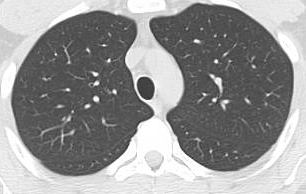

In [ ]:
img3

# GradCam Testing

# Steps for plotting GradCAM

>Create your Learner's test_dl w.r.t. one image and label
Compute activations (forward pass) and gradients (backward pass)
Compute gradcam-map (7x7 in this case)
Take mean of gradients across feature maps: (1280, 7, 7) --> (1280, 1, 1)
Multiply mean activation: `(1280,1,1) (1280,7,7) --> (1280,7,7)`
Sum (B) across all 1280 channels: (1280,7,7) --> (7,7)
Plot gradcam-map over the image
These steps are shown below one by one and later combined in a Learner.gradcam call

In [ ]:
#collapse-show
class Hook():
    def __init__(self, m):
        self.hook = m.register_forward_hook(self.hook_func)
    def hook_func(self, m, inp, out):  self.stored = out.detach().clone()
    def __enter__(self, *args): return self
    def __exit__ (self, *args): self.hook.remove()

class HookBwd():
    def __init__(self,m):
        self.hook = m.register_backward_hook(self.hook_func)
    def hook_func(self, model, grad_in, grad_out): self.stored = grad_out[0].detach().clone()
    def __enter__(self, *args): return self
    def __exit__ (self, *args): self.hook.remove()

In [ ]:
#collapse-show
## 1. Create your Learner's test_dl w.r.t. one image and label
def create_test_img(learn, f, return_img=True):
    img = PILImage.create(f)
    x = first(learn.dls.test_dl([f]))
    x = x[0]
    if return_img: return img,x
    return x

In [ ]:
path=Path('sarscov2-ctscan-dataset')

In [ ]:
path.ls()

(#2) [Path('sarscov2-ctscan-dataset/COVID'),Path('sarscov2-ctscan-dataset/non-COVID')]

In [ ]:
# path_imgs = 'sarscov2-ctscan-dataset'
f = get_image_files(path)[1]

img,x = create_test_img(learn, f)
label = np.random.choice(learn.dls.vocab)
label

'non-COVID'

In [ ]:
path_imgs = '../assets/imgs/'
f = get_image_files(path_imgs)[2]

img,x = create_test_img(learn, f)
label = np.random.choice(learn.dls.vocab)
label

In [ ]:
#collapse-show
#2. Compute activations (forward pass) and gradients (backward pass)
#export
def to_cuda(*args): [o.cuda() for o in args]

In [ ]:
#collapse-show
def get_label_idx(learn:Learner, preds:torch.Tensor,
                  label:Union[str,int,None]) -> Tuple[int,str]:
    """Either:
    * Get the label idx of a specific `label`
    * Get the max pred using `learn.loss_func.decode` and `learn.loss_func.activation`
        * Only works for `softmax` activations as the backward pass requires a scalar index
        * Throws a `RuntimeError` if the activation is a `sigmoid` activation
    """
    if label is not None:
        # if `label` is a string, check that it exists in the vocab
        # and return the label's index
        if isinstance(label,str):
            if not label in learn.dls.vocab: raise ValueError(f"'{label}' is not part of the Learner's vocab: {learn.dls.vocab}")
            return learn.dls.vocab.o2i[label], label
        # if `label` is an index, return itself
        elif isinstance(label,int): return label, learn.dls.vocab[label]
        else: raise TypeError(f"Expected `str`, `int` or `None`, got {type(label)} instead")
    else:
        # if no `label` is specified, check that `learn.loss_func` has `decodes`
        # and `activation` implemented, run the predictions through them,
        # then check that the output length is 1. If not, the activation must be
        # sigmoid, which is incompatible
        if not hasattr(learn.loss_func, 'activation') or\
           not hasattr(learn.loss_func, 'decodes'):
            raise NotImplementedError(f"learn.loss_func does not have `.activation` or `.decodes` methods implemented")
        decode_pred = compose(learn.loss_func.activation, learn.loss_func.decodes)
        label_idx   = decode_pred(preds)
        if len(label_idx) > 1:
            raise RuntimeError(f"Output label idx must be of length==1. If your loss func has a sigmoid activation, please specify `label`")
        return label_idx, learn.dls.vocab[label_idx][0]

In [ ]:
#collapse-show
def get_target_layer(learn: Learner,
                     target_layer:Union[nn.Module, Callable, None]) -> nn.Module:
    if target_layer is None:
        if has_pool_type(learn.model[0]):
            warnings.warn(f"Detected a pooling layer in the model body. Unless this is intentional, ensure that the feature map is not flattened")
        return learn.model[0]
    elif isinstance(target_layer, nn.Module):
        return target_layer
    elif callable(target_layer):
        return target_layer(learn.model)

In [ ]:
from nbdev.showdoc import show_doc

In [ ]:
#collapse-show
def compute_gcam_items(learn: Learner,
                       x: TensorImage,
                       label: Union[str,int,None] = None,
                       target_layer: Union[nn.Module, Callable, None] = None
                      ) -> Tuple[torch.Tensor]:
    """Compute gradient and activations of `target_layer` of `learn.model`
    for `x` with respect to `label`.

    If `target_layer` is None, then it is set to `learn.model[:-1]`
    """
    to_cuda(learn.model, x)
    target_layer = get_target_layer(learn, target_layer)
    with HookBwd(target_layer) as hook_g:
        with Hook(target_layer) as hook:
            preds       = learn.model.eval()(x)
            activations = hook.stored
            label_idx, label = get_label_idx(learn,preds,label)
            #print(preds.shape, label, label_idx)
            #print(preds)
        preds[0, label_idx].backward()
        gradients = hook_g.stored

    preds = getattr(learn.loss_func, 'activation', noop)(preds)

    # remove leading batch_size axis
    gradients   = gradients  [0]
    activations = activations[0]
    preds       = preds.detach().cpu().numpy().flatten()
    return gradients, activations, preds, label

In [ ]:
gradients, activations, preds, label = compute_gcam_items(learn, x, label=None, target_layer=None)

gradients.shape, activations.shape, preds.shape, label

<ipython-input-137-c549b6a525cc>:6: UserWarning: Detected a pooling layer in the model body. Unless this is intentional, ensure that the feature map is not flattened
  warnings.warn(f"Detected a pooling layer in the model body. Unless this is intentional, ensure that the feature map is not flattened")


(torch.Size([2048, 7, 7]), torch.Size([2048, 7, 7]), (2,), 'COVID')

In [ ]:
#3. Compute gradcam-map

In [ ]:
#collapse-show
#export
def compute_gcam_map(gradients, activations) -> torch.Tensor:
    """Take the mean of `gradients`, multiply by `activations`,
    sum it up and return a GradCAM feature map
    """
    # Mean over the feature maps. If you don't use `keepdim`, it returns
    # a value of shape (1280) which isn't amenable to `*` with the activations
    gcam_weights = gradients.mean(dim=[1,2], keepdim=True) # (1280,7,7)   --> (1280,1,1)
    gcam_map     = (gcam_weights * activations) # (1280,1,1) * (1280,7,7) --> (1280,7,7)
    gcam_map     = gcam_map.sum(0)              # (1280,7,7) --> (7,7)
    return gcam_map

In [ ]:
gcam_map = compute_gcam_map(gradients, activations)
gcam_map.shape

torch.Size([7, 7])

In [ ]:
#4. Plot gradcam-map over the image

In [ ]:
#collapse-show
#export
import PIL
def plt2pil(fig) -> PIL.Image.Image:
    """Convert a matplotlib `figure` to a PILImage"""
    buf = io.BytesIO()
    fig.savefig(buf, bbox_inches='tight', pad_inches=0)
    buf.seek(0)
    pil_img = PIL.Image.open(buf).convert('RGB')
    plt.close('all')
    return pil_img

def plt_decoded(learn, x, ctx):
    'Processed tensor --> plottable image, return `extent`'
    x_decoded = TensorImage(learn.dls.train.decode((x,))[0][0])
    extent = (0, x_decoded.shape[1], x_decoded.shape[2], 0)
    x_decoded.show(ctx=ctx)
    return extent

def plot_gcam(learn, img:PILImage, x:tensor, gcam_map:tensor,
              full_size=True, alpha=0.6, dpi=100,
              interpolation='bilinear', cmap='magma', **kwargs):
    'Plot the `gcam_map` over `img`'
    fig,ax = plt.subplots(dpi=dpi, **kwargs)
    if full_size:
        extent = (0, img.width,img.height, 0)
        show_image(img, ctx=ax)
    else:
        extent = plt_decoded(learn, x, ax)

    show_image(gcam_map.detach().cpu(), ctx=ax,
               alpha=alpha, extent=extent,
               interpolation=interpolation, cmap=cmap)

    return plt2pil(fig)

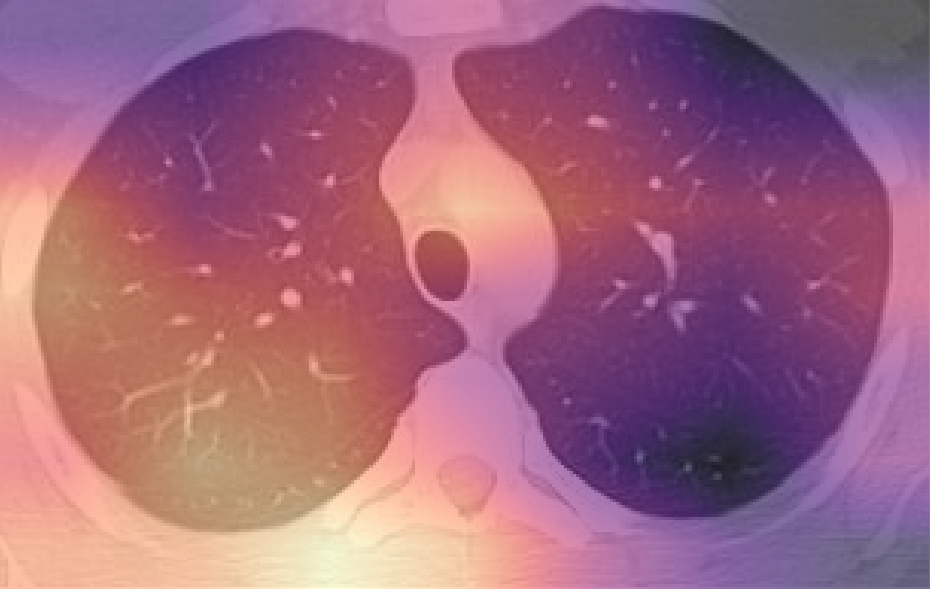

In [ ]:
plot_gcam(learn, img3, x, gcam_map, full_size=True, dpi=300)

In [ ]:
#collapse-show
from fastai.vision.all import *
from typing import List, Tuple, Callable, Union, Optional, Any, Dict

In [ ]:
#collapse-show
from palettable.colorbrewer.diverging import RdYlBu_10_r
from fastai_amalgam.utils import *

@patch
def gradcam(self: Learner,
            item: Union[PILImage, os.PathLike],
            target_layer: Union[nn.Module, Callable, None] = None,
            labels: Union[str,List[str], int,List[int], None] = None,
            show_original=False, img_size=None, alpha=0.5,
            cmap = RdYlBu_10_r.mpl_colormap,
            font_path=None, font_size=None, grid_ncol=4,
            **kwargs
           ):
    """Plot Grad-CAMs of all specified `labels` with respect to `target_layer`
    Key Args:
    * `item`: a `PILImage` or path to a file. Use like you would `Learner.predict`
    * `target_layer`: The target layer w.r.t which the Grad-CAM is produced
                      Can be a function that returns a specific layer of the model
      or also a direct reference such as `learn.model[0][2]`. If `None`,
      defaults to `learn.model[0]`
    * `labels`: A string, int index, or list of the same w.r.t which the Grad-CAM
                must be plotted. If `None`, the top-prediction is plotted if the
      model uses a Softmax activation, else it must be specified.
    * `show_original`: Show the original image without the heatmap overlay
    * `font_path`: (Optional, recommended) Path to a `.ttf` font to render the text
    * `font_size`: Size of the font rendered on the image
    * `grid_ncol`: No. of columns to be shown. By default, all maps are shown in one row
    """
    dl = self.dls.test_dl([item])
    x = detuplify(first(dl))


    if not isinstance(labels, list): labels=[labels]
    if isinstance(item, PILImage): img = item
    else: img = PILImage.create(item)
    if img_size is not None: img=img.resize(img_size)
    if grid_ncol is None: grid_ncol = 1+len(labels) if show_original else len(labels)

    gcams = defaultdict()

    results = []
    for label in labels:
        grads, acts, preds, _label = compute_gcam_items(self, x, label, target_layer)
        gcams[label] = compute_gcam_map(grads, acts)
        preds_dict = {l:pred for pred,l in zip(preds, self.dls.vocab)}
        pred_img = plot_gcam(self, img, x, gcams[label], alpha=alpha, cmap=cmap)
        pred_img.draw_labels(f"{_label}: {preds_dict[_label]* 100:.02f}%",
                             font_path=font_path, font_size=font_size, location="top")
        results.append(pred_img)
    if show_original:
        img = img.resize(results[0].size)
        results.insert(0, img.draw_labels("Original", font_path=font_path, font_size=font_size, location="top"))
    return make_img_grid(results, img_size=None, ncol=grid_ncol)

In [ ]:
#collapse-hide
show_doc(Learner.gradcam)

<h4 id="Learner.gradcam" class="doc_header"><code>Learner.gradcam</code><a href="__main__.py#L4" class="source_link" style="float:right">[source]</a></h4>

> <code>Learner.gradcam</code>(**`item`**:`Union`\[`PILImage`, `PathLike`\], **`target_layer`**:`Union`\[`Module`, `Callable`, `NoneType`\]=*`None`*, **`labels`**:`Union`\[`str`, `List`\[`str`\], `int`, `List`\[`int`\], `NoneType`\]=*`None`*, **`show_original`**=*`False`*, **`img_size`**=*`None`*, **`alpha`**=*`0.5`*, **`cmap`**=*`<matplotlib.colors.LinearSegmentedColormap object at 0x7f5bf43be4c0>`*, **`font_path`**=*`None`*, **`font_size`**=*`None`*, **`grid_ncol`**=*`4`*, **\*\*`kwargs`**)

Plot Grad-CAMs of all specified `labels` with respect to `target_layer`
Key Args:
* `item`: a `PILImage` or path to a file. Use like you would `Learner.predict`
* `target_layer`: The target layer w.r.t which the Grad-CAM is produced
                  Can be a function that returns a specific layer of the model
  or also a direct reference such as `learn.model[0][2]`. If `None`,
  defaults to `learn.model[0]`
* `labels`: A string, int index, or list of the same w.r.t which the Grad-CAM
            must be plotted. If `None`, the top-prediction is plotted if the
  model uses a Softmax activation, else it must be specified.
* `show_original`: Show the original image without the heatmap overlay
* `font_path`: (Optional, recommended) Path to a `.ttf` font to render the text
* `font_size`: Size of the font rendered on the image
* `grid_ncol`: No. of columns to be shown. By default, all maps are shown in one row

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
im = PILImage.create(btn_upload.data[-1])


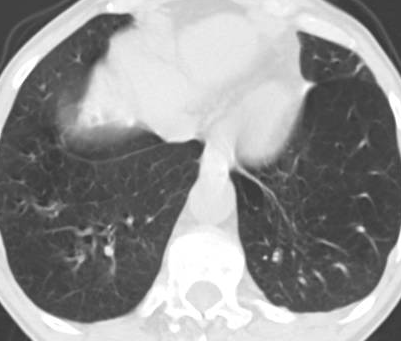

In [ ]:
im

In [ ]:
#collapse-hide
Learner.gradcam(item=im, target_layer=learn.model[0])

TypeError: gradcam() missing 1 required positional argument: 'self'

In [ ]:
#collapse-hide
learn.gradcam(im, learn.model[0],show_orignal)

NameError: name 'show_orignal' is not defined

In [ ]:
#collapse-show
learn.model[1]

Sequential(
  (0): AdaptiveConcatPool2d(
    (ap): AdaptiveAvgPool2d(output_size=1)
    (mp): AdaptiveMaxPool2d(output_size=1)
  )
  (1): Flatten(full=False)
  (2): BatchNorm1d(4096, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Dropout(p=0.25, inplace=False)
  (4): Linear(in_features=4096, out_features=512, bias=False)
  (5): ReLU(inplace=True)
  (6): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): Dropout(p=0.5, inplace=False)
  (8): Linear(in_features=512, out_features=2, bias=False)
)

/opt/conda/envs/fastai/lib/python3.8/site-packages/fastai_amalgam/utils.py:92: UserWarning: Loaded default PIL ImageFont. It's highly recommended you use a custom font as the default font's size cannot be tweaked
  warnings.warn("Loaded default PIL ImageFont. It's highly recommended you use a custom font as the default font's size cannot be tweaked")


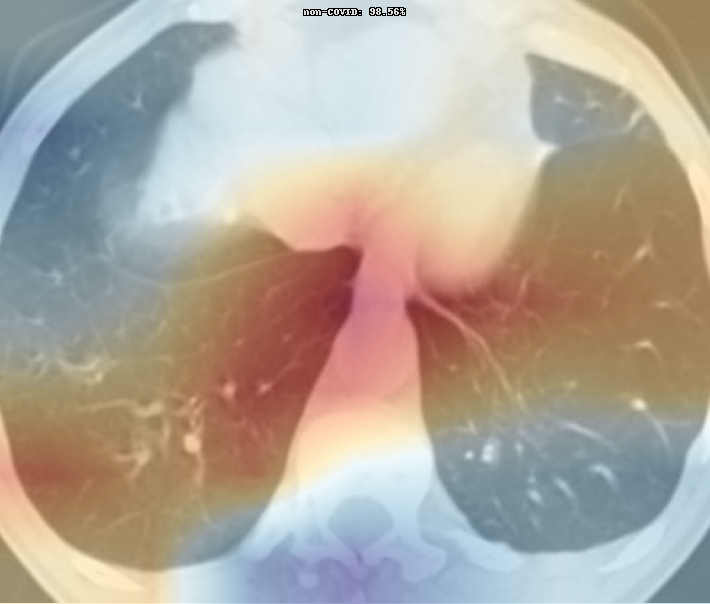

In [ ]:
#collapse-show
learn.gradcam(item=im, target_layer=learn.model[0])

<ipython-input-137-c549b6a525cc>:6: UserWarning: Detected a pooling layer in the model body. Unless this is intentional, ensure that the feature map is not flattened
  warnings.warn(f"Detected a pooling layer in the model body. Unless this is intentional, ensure that the feature map is not flattened")
/opt/conda/envs/fastai/lib/python3.8/site-packages/fastai_amalgam/utils.py:92: UserWarning: Loaded default PIL ImageFont. It's highly recommended you use a custom font as the default font's size cannot be tweaked
  warnings.warn("Loaded default PIL ImageFont. It's highly recommended you use a custom font as the default font's size cannot be tweaked")


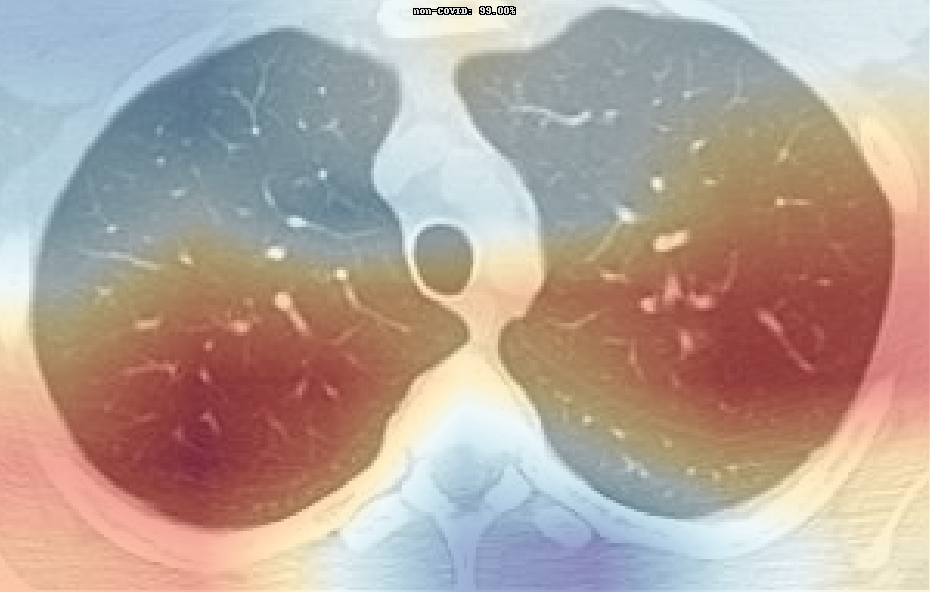

In [ ]:
#collapse-show
# Try With your Image
#f = "../assets/imgs/atomic-blonde.jpg"
# Way 1
learn.gradcam(im2 )

In [ ]:
#collapse-hide
#Way 2
# learn.gradcam(f, labels=None, img_size=None, show_original=True, font_size=16, font_path="../fonts/DIN Alternate Bold.ttf")

In [ ]:
#collapse-hide
#Way 3
# f = get_image_files(path_imgs)[2]
# learn.gradcam(f, labels=['01-extremewide', '02-wide'], img_size=(224,224), alpha=0.45, show_original=True)

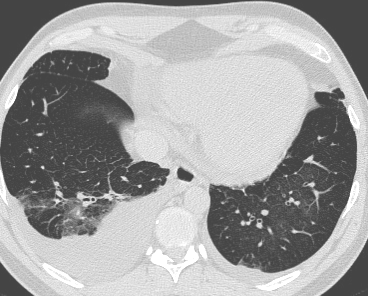

In [ ]:
img

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
img= PILImage.create(btn_upload.data[-1])


In [ ]:
img.shape

(350, 408)

In [ ]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(384,404))
out_pl

Output()

In [ ]:
dls.vocab


['COVID', 'non-COVID']

In [ ]:
pred,pred_idx,probs = learn.predict(img)


In [ ]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: non-COVID; Probability: 0.9286')

In [ ]:
#hide
# file = open("images/WidgetArch.png", "rb")
# image = file.read()
# widgets.Image(
#     value=image,
#     format='png',
#     width=300,
#     height=400
# )

In [ ]:
#collapse-hide
from ipywidgets import Button, Layout

# b = Button(description='(50% width, 80px height) button',
#            layout=Layout(width='50%', height='80px'))


In [ ]:
btn_run = widgets.Button(description='Classify',layout=Layout(width='40%', height='80px'), button_style='success')
btn_run

Button(button_style='success', description='Classify', layout=Layout(height='80px', width='40%'), style=Button…

In [ ]:
#collapse-show
#Click event handler adds functionality to buttton
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(320,320))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [ ]:
from fastai.vision.core import *
from ipywidgets import HBox,VBox,widgets,Button,Checkbox,Dropdown,Layout,Box,Output,Label,FileUpload

In [ ]:
HeatMp = widgets.Button(description='MAGIC', layout=btn_run.layout, button_style='danger')
HeatMp

Button(button_style='danger', description='MAGIC', layout=Layout(height='80px', width='40%'), style=ButtonStyl…

In [ ]:
#collapse-show
def on_click_map(change):
    with out_pl: display(img.to_thumb(320,320))
    learn.gradcam(img).clear(out_pl)
HeatMp.on_click(on_click_map)

In [ ]:
#hide
# def on_click_map(change):
#     x_dec = TensorImage(dls.train.decode((x,))[0][0])
#     _,ax = plt.subplots()
#     x_dec.show(ctx=ax)
#     ax.imshow(cam_map.detach().cpu(), alpha=0.6, extent=(0,224,224,0),
#               interpolation='bilinear', cmap='magma');

# HeatMp.on_click(on_click_map)

In [ ]:
#collapse-hide
#Putting the app together
VBox([widgets.Label('INPUT YOUR CT SCAN IMAGE FOR DETECTION!'),
      btn_upload, btn_run, out_pl, lbl_pred,widgets.Label('Do You Want to See How our Model Decides which is Covid and Which is not?'),widgets.Label("Click Here To Learn how These predictions are made"), HeatMp])

<ipython-input-137-c549b6a525cc>:6: UserWarning: Detected a pooling layer in the model body. Unless this is intentional, ensure that the feature map is not flattened
  warnings.warn(f"Detected a pooling layer in the model body. Unless this is intentional, ensure that the feature map is not flattened")


<ipython-input-137-c549b6a525cc>:6: UserWarning: Detected a pooling layer in the model body. Unless this is intentional, ensure that the feature map is not flattened
  warnings.warn(f"Detected a pooling layer in the model body. Unless this is intentional, ensure that the feature map is not flattened")
<ipython-input-137-c549b6a525cc>:6: UserWarning: Detected a pooling layer in the model body. Unless this is intentional, ensure that the feature map is not flattened
  warnings.warn(f"Detected a pooling layer in the model body. Unless this is intentional, ensure that the feature map is not flattened")
/opt/conda/envs/fastai/lib/python3.8/site-packages/fastai_amalgam/utils.py:92: UserWarning: Loaded default PIL ImageFont. It's highly recommended you use a custom font as the default font's size cannot be tweaked
  warnings.warn("Loaded default PIL ImageFont. It's highly recommended you use a custom font as the default font's size cannot be tweaked")


AttributeError: 'Image' object has no attribute 'clear'

<ipython-input-137-c549b6a525cc>:6: UserWarning: Detected a pooling layer in the model body. Unless this is intentional, ensure that the feature map is not flattened
  warnings.warn(f"Detected a pooling layer in the model body. Unless this is intentional, ensure that the feature map is not flattened")


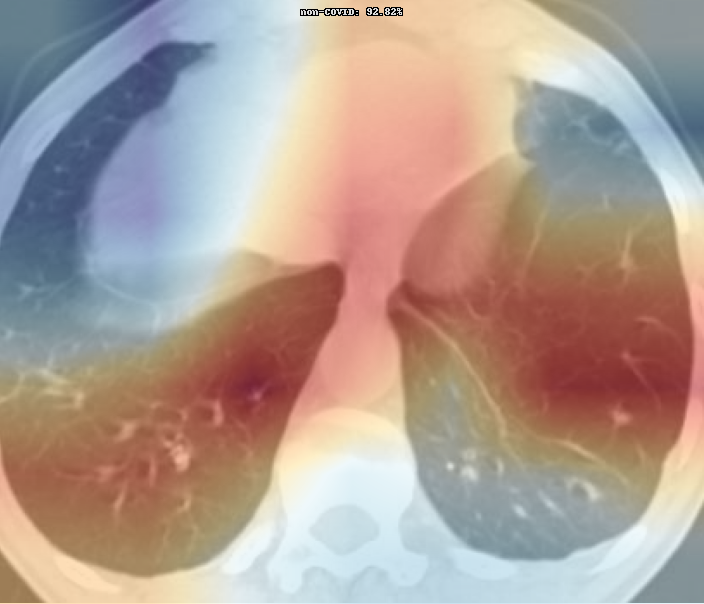

In [ ]:
learn.gradcam(img)

In [ ]:
#collapse-hide 
#file = open("../input/img-covify/logo 1.jpg", "rb")
# image = file.read()
# cvf=widgets.Image(
#     value=image,
#     format='png',
#     width=300,
#     height=400,
#     #layout=Layout(width='60%', height='150px')
# )
# cvf

In [ ]:
!ls

In [ ]:
from fastai.test_utils import *

In [ ]:
#hide
# from fastai.data.all import *
# from fastai.optimizer import *

In [ ]:
from fastai.callback.hook import *

In [ ]:
x, = first(dls.test_dl([img]))

In [ ]:
class Hook():
    def __init__(self, m):
        self.hook = m.register_forward_hook(self.hook_func)
    def hook_func(self, m, i, o): self.stored = o.detach().clone()
    def __enter__(self, *args): return self
    def __exit__(self, *args): self.hook.remove()

In [ ]:
with Hook(learn.model[0]) as hook:
    with torch.no_grad(): output = learn.model.eval()(x.cuda())
    act = hook.stored


In [ ]:
#hide
# hook_output = Hook()
# hook = learn_model.model[0].register_forward_hook(hook_output.hook_func)

In [ ]:
# starts Grad Cam Apporach 
#We use a HookBwd class that works like Hook, but intercepts and stores gradients instead of activations:
class HookBwd():
    def __init__(self, m):
        self.hook = m.register_backward_hook(self.hook_func)
    def hook_func(self, m, gi, go): self.stored = go[0].detach().clone()
    def __enter__(self, *args): return self
    def __exit__(self, *args): self.hook.remove()

In [ ]:
#This Grad-Cam approach to plot activations can be used for any layer
cls = 1
#for last layer activaions
with HookBwd(learn.model[0]) as hookg:
    with Hook(learn.model[0]) as hook:
        output = learn.model.eval()(x.cuda())
        act = hook.stored
    output[0,cls].backward()
    grad = hookg.stored

In [ ]:
w = grad[0].mean(dim=[1,2], keepdim=True)
cam_map = (w * act[0]).sum(0)

In [ ]:
x.shape

In [ ]:
x_dec = TensorImage(dls.train.decode((x,))[0][0])

In [ ]:
#collapse-show
#We can veiw the Activation map for this Layer by this::
x_dec = TensorImage(dls.train.decode((x,))[0][0])
_,ax = plt.subplots()
#_,ax = plt.subplots()
x_dec.show(ctx=ax)
ax.imshow(cam_map[1].detach().cpu(), alpha=0.6, extent=(0,224,224,0),
              interpolation='bilinear', cmap='magma');

In [ ]:
#collapse-show
def on_click_map(change):
    x_dec = TensorImage(dls.train.decode((x,))[0][0])
    _,ax = plt.subplots()
    x_dec.show(ctx=ax)
    ax.imshow(cam_map.detach().cpu(), alpha=0.6, extent=(0,224,224,0),
              interpolation='bilinear', cmap='magma');

HeatMp.on_click(on_click_map)

In [ ]:
#hide
# out_hmp = widgets.Output()
# out_hmp.clear_output()
# with out_hmp:
#     ax.imshow(cam_map.detach().cpu(), alpha=0.6, extent=(0,224,224,0),
#               interpolation='bilinear', cmap='magma')
    
# display(out_hmp)

In [ ]:
#collapse-hide
from fastai.data.all import *
from fastai.optimizer import *

In [ ]:
#hide
jovian.commit(project="minor_fast_ai_resnet_50_kaggle")

In [ ]:
#collapse-show
!pip install voila
!jupyter serverextension enable voila --sys-prefix

In [ ]:
#hide
# db = DataBlock(blocks=(ImageBlock, CategoryBlock),
#                    get_items=get_image_files,
#                    splitter=FuncSplitter(valid_func),
#                    get_y=parent_label,
#                    item_tfms=Resize(460),
#                    batch_tfms=[*aug_transforms(size=224),
#                                Normalize.from_stats(*imagenet_stats)])

# data=db.dataloaders(data_dir)
    

In [ ]:
#hide
# dls = db.dataloaders(data_dir)
# #dls.show_batch(max_n=9)

In [ ]:
#hide
# get_dls.show_batch(max_n=9, figsize=(4,4))